## MLP

### Imports

In [36]:
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Load Dataset

In [37]:
data = pd.read_csv('../datasets/label/BNFs_LMA_DATA.csv')

y = data.pop('EMOTION')
X = data

data.head()

no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)

classes = y.unique()
num_classes = len(y.unique())
print("Classes:", classes)
print("Num Classes:", num_classes)

X.head()

No. entries: 22000 
No. Features: 33
Classes: ['afraid' 'angry' 'bored' 'disgusted' 'excited' 'happy' 'neutral'
 'pleased' 'relaxed' 'sad' 'tired']
Num Classes: 11


,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.540381,0.495284,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.001726
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.540541,0.495912,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.001375
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.540611,0.495445,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.000992
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.540575,0.495760,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.000988
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.540601,0.495548,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.001547


In [38]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)
print(y, "\n")

print(y.shape[1])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]] 

11


### Get Train/Test datasets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
16867,0.398979,0.421488,0.493688,0.338492,0.578592,0.380410,0.535739,0.279518,0.474895,0.944358,...,0.284773,0.481100,0.599436,0.404331,0.316039,0.651326,0.347962,0.467072,0.337073,0.300198
15178,0.375873,0.339553,0.220944,0.245633,0.671640,0.574658,0.556427,0.487828,0.321341,0.967171,...,0.574465,0.526623,0.587829,0.413656,0.515335,0.651089,0.453526,0.371135,0.341135,0.033661
1955,0.321530,0.652459,0.629018,0.241863,0.717548,0.697528,0.660126,0.630001,0.312594,0.998416,...,0.589907,0.561710,0.584900,0.412836,0.500658,0.632083,0.411552,0.477461,0.397051,0.158704
10769,0.754866,0.899332,0.183086,0.467214,0.908021,0.575157,0.920996,0.458459,0.501297,0.945455,...,0.608850,0.483753,0.595595,0.424732,0.433859,0.630670,0.331058,0.527180,0.572806,0.080293
10856,0.466874,0.352095,0.301774,0.391275,0.666628,0.639077,0.608401,0.570749,0.326203,0.873944,...,0.533638,0.554795,0.601124,0.441563,0.612517,0.645818,0.424611,0.507667,0.474411,0.163163


### Define Network

In [41]:
model = Sequential()

model.add(Dense(64, input_dim = no_variables, activation = 'relu')) #Input

model.add(Dense(48, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))

model.add(Dense(num_classes, activation='softmax')) #Output

In [42]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

### Train

In [43]:
model.fit(X_train, y_train, epochs = 128, shuffle = True, batch_size=32)

Epoch 1/128
461/461 [==============================] - 2s 877us/step - loss: 2.0492 - accuracy: 0.2836
Epoch 2/128
461/461 [==============================] - 0s 860us/step - loss: 1.5990 - accuracy: 0.4121
Epoch 3/128
461/461 [==============================] - 0s 854us/step - loss: 1.4969 - accuracy: 0.4485
Epoch 4/128
461/461 [==============================] - 0s 867us/step - loss: 1.4269 - accuracy: 0.4839
Epoch 5/128
461/461 [==============================] - 0s 861us/step - loss: 1.3895 - accuracy: 0.4946
Epoch 6/128
461/461 [==============================] - 0s 859us/step - loss: 1.3502 - accuracy: 0.5104
Epoch 7/128
461/461 [==============================] - 0s 876us/step - loss: 1.3199 - accuracy: 0.5168
Epoch 8/128
461/461 [==============================] - 0s 865us/step - loss: 1.2911 - accuracy: 0.5250
Epoch 9/128
461/461 [==============================] - 0s 862us/step - loss: 1.2697 - accuracy: 0.5307
Epoch 10/128
461/461 [==============================] - 0s 862us/step - l

### Test

In [44]:
scores = model.evaluate(X_test, y_test)
print(model.metrics_names[0], model.metrics_names[1])

227/227 [==============================] - 0s 778us/step - loss: 0.7999 - accuracy: 0.7132
loss accuracy


In [45]:
target_names = classes

# get predict prob and label 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

      afraid       0.52      0.41      0.46       622
       angry       0.45      0.48      0.47       685
       bored       0.95      0.97      0.96       674
   disgusted       0.54      0.40      0.46       650
     excited       0.98      0.99      0.98       686
       happy       0.47      0.44      0.46       687
     neutral       0.50      0.78      0.61       682
     pleased       0.97      0.96      0.96       648
     relaxed       0.96      0.99      0.97       648
         sad       0.64      0.47      0.55       647
       tired       0.87      0.94      0.90       631

    accuracy                           0.71      7260
   macro avg       0.71      0.71      0.71      7260
weighted avg       0.71      0.71      0.71      7260



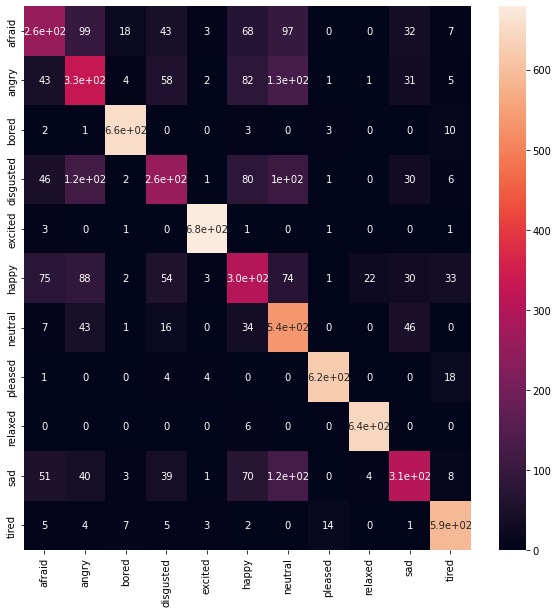

In [46]:
## Confusion Matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = pd.DataFrame(cm, target_names,target_names)
plt.figure(figsize = (10,10))

sns.heatmap(cm, annot=True)
plt.show()

### Test to see if I can predict the emotion of something that's not in the Kin dataset

In [61]:
import csv

header = ["avg_hand_distance", "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance", "avg_feet_distance",
          "avg_l_hand_chest_distance", "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance", "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance", "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x","avg_neck_rotation_y", "avg_neck_rotation_z", 
          "avg_pelvis_rotation_w", "avg_pelvis_rotation_x", "avg_pelvis_rotation_y", "avg_pelvis_rotation_z",
          "std_l_hand_position", "std_r_hand_position",
          "avg_l_forearm_velocity", "avg_r_forearm_velocity",
          "avg_pelvis_velocity_x", "avg_pelvis_velocity_y", "avg_pelvis_velocity_z", 
          "avg_l_foot_velocity_x", "avg_l_foot_velocity_y", "avg_l_foot_velocity_z",
          "avg_r_foot_velocity_x", "avg_r_foot_velocity_y", "avg_r_foot_velocity_z", 
          "avg_upper_body_volume",
          "avg_total_body_volume", "avg_distance_traveled",
                   ]

meta_file = "lma_features/sad_2_walk.txt"

lma_features = []


        
with open('lma_features/sad_2_walk.txt', 'r') as f:
    for line in f:
        lma_features.append(ast.literal_eval(line)) #ast.literal_eval converts dict string into dict

for entry in lma_features:
    row = []
    for feature in entry["lma_features"]:
        if(type(feature) is tuple):
            for i in feature:
                row.append(i)
        else:
            row.append(feature)

with open('../datasets/label/random_entry_for_test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for entry in lma_features:
        row = []
        for feature in entry["lma_features"]:
            if(type(feature) is tuple):
                for i in feature:
                    row.append(i)
            else:
                row.append(feature)

        writer.writerow(row)


In [65]:
oof = pd.read_csv('../datasets/label/random_entry_for_test.csv', nrows=1)
oof = oof.drop(columns=['avg_total_body_volume'])
oof.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,1.401456,0.773748,0.77256,0.280924,0.707824,0.701128,0.572887,0.572288,0.286151,0.278173,...,0.001479,-0.019047,0.03227,0.064936,-0.00854,0.002246,0.074315,-0.023442,0.076001,0.000202


In [72]:
predictions = model.predict(oof)
print(np.argmax(predictions[0]))
print(target_names[np.argmax(predictions[0])])
#wtf it worked?!

9
sad
